In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cfe(surfdens):
  cfe = 0.063 * (surfdens/10.)**0.8
  mask = cfe > 1.
  cfe[mask] = 1.
  return cfe

In [3]:
grudic = np.loadtxt('grudic_cfe.txt', delimiter=',')
grudic_sigma = np.loadtxt('grudicsigma_cfe.txt', delimiter=',')
kruijssen = np.loadtxt('kruijssen_cfe.txt', delimiter=',')
m31_cfe = np.loadtxt('m31_cfe.txt', delimiter=',')
m51_cfe = np.loadtxt('m51_cfe.txt', delimiter=',')
m83_cfe = np.loadtxt('m83_cfe.txt', delimiter=',')
solar_cfe = np.loadtxt('solar_cfe.txt', delimiter=',')

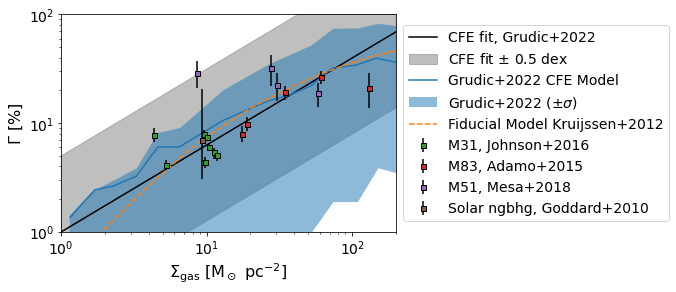

In [42]:
surfdens = np.logspace(0,np.log10(2e2),10000)

plt.loglog(surfdens, 100*cfe(surfdens),c='k', label='CFE fit, Grudic+2022')
plt.fill_between(surfdens, 100*cfe(surfdens)*5, 100*cfe(surfdens)/5, alpha=.5, color='grey',label=r'CFE fit $\pm$ 0.5 dex')
plt.loglog(grudic[:,0], grudic[:,1], label='Grudic+2022 CFE Model')
plt.fill_between(grudic_sigma[:,0], grudic_sigma[:,1], grudic_sigma[:,2], alpha=.5, label=r'Grudic+2022 ($\pm \sigma$)')
plt.loglog(kruijssen[:,0], kruijssen[:,1], '--',label='Fiducial Model Kruijssen+2012')
plt.errorbar(m31_cfe[::3,0], m31_cfe[::3,1], yerr=[m31_cfe[::3,1] - m31_cfe[2::3,1], m31_cfe[1::3,1] - m31_cfe[::3,1]],fmt='s', mec='k', ecolor='k',ms=5,label='M31, Johnson+2016')
plt.errorbar(m83_cfe[::3,0], m83_cfe[::3,1], yerr=[m83_cfe[::3,1] - m83_cfe[2::3,1], m83_cfe[1::3,1] - m83_cfe[::3,1]],fmt='s', mec='k', ecolor='k',ms=5,label='M83, Adamo+2015')
plt.errorbar(m51_cfe[::3,0], m51_cfe[::3,1], yerr=[m51_cfe[::3,1] - m51_cfe[2::3,1], m51_cfe[1::3,1] - m51_cfe[::3,1]],fmt='s', mec='k', ecolor='k',ms=5,label='M51, Mesa+2018')
plt.errorbar(solar_cfe[::3,0], solar_cfe[::3,1], yerr=[solar_cfe[::3,1] - solar_cfe[2::3,1],solar_cfe[1::3,1] - solar_cfe[::3,1]],fmt='s', mec='k', ecolor='k',ms=5,label='Solar ngbhg, Goddard+2010')
plt.ylim(1,100)
plt.xlim(1,200)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel(r'$\Sigma_{\rm{gas}}$ [M$_\odot$ pc$^{-2}$]', fontsize=16)
plt.ylabel('$\Gamma$ [%]', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

In [2]:
def mass_radius(mass):
    return 4.35 * (mass/1e4)**0.225
def mass_radius_1_10(mass):
    return 2.365 * (mass/1e4)**0.180
def mass_radius_10_100(mass):
    return 2.506 * (mass/1e4)**0.279
def mass_radius_100_1(mass):
    return 2.558 * (mass/1e4)**0.271
def mass_radius_1_4(mass):
    return 3.75 * (mass/1e4)**0.1

mass = np.logspace(2,6,100)
radius = mass_radius(mass)
radius_1_10 = mass_radius_1_10(mass)
radius_10_100 = mass_radius_10_100(mass)
radius_100_1 = mass_radius_100_1(mass)
radius_1_4 = mass_radius_1_4(mass)

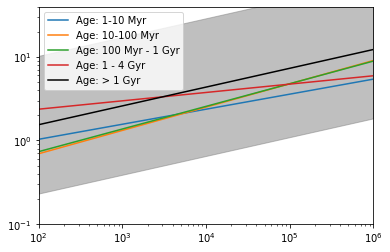

In [4]:
plt.figure(facecolor=None, edgecolor=None, frameon=False)
plt.fill_between(mass, radius*.15, radius/.15, alpha=.5, color='grey')
plt.loglog(mass, radius_1_10, label='Age: 1-10 Myr')
plt.loglog(mass, radius_10_100, label='Age: 10-100 Myr')
plt.loglog(mass, radius_100_1, label='Age: 100 Myr - 1 Gyr')
plt.loglog(mass, radius_1_4, label='Age: 1 - 4 Gyr')
plt.loglog(mass, radius, c='k', label='Age: > 1 Gyr')
plt.xlim(1e2,1e6)
plt.ylim(1e-1,4e1)
# plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
plt.legend()
# plt.tight_layout()
# plt.savefig('mass_radius.png', transparent=True)